<img src="https://marketing4ecommerce.net/wp-content/uploads/2015/09/logo-iebs.jpg" style="float:right" width="400">

# Introducción a los lenguajes de programación

## Caso Práctico: Estudio de un dataset

### Javier Cózar

*Entregado por Bruno Anglés (16/12/2022)*


# Dataset

En esta libreta vamos a trabajar con un conjunto de datos obtenido de [Kaggle](https://www.kaggle.com/abecklas/fifa-world-cup?select=WorldCupMatches.csv) que contiene los datos de la FIFA de la copa del mundo. Recomendamos acceder a este enlace para descargar los ficheros a trabajar, aunque también disponéis de los archivos ya descargados en la sección de recursos. Utilizaremos estos tres ficheros:

- WorldCupMatches.csv: Datos de los partidos disputados
- WorldCupPlayers.csv: Datos de los jugadores que han jugado en cada partido
- WorldCups.csv: Datos de las copas disputadas y los resultados

# Introducción

Mediante esta libreta vamos a explorar los datos almacenados en estos tres ficheros y a responder preguntas haciendo operaciones y transformaciones con pandas. Además de completar las celdas de código para responder a los ejercicios, cuando así se indique se deberá añadir una celda de tipo _markdown_ explicando con texto enriquecido la información o las conclusiones extraídas.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
# Cargamos el conjunto de datos WorldCupMatches
df_partidos = pd.read_csv("WorldCupMatches.csv")

**NOTA:** en una actividad anterior completamos los ejercicios del 1 al 3, copiar y pegar dicho trabajo en esta libreta con el fin de tener un report completo que analize los datos del problema. Es decir, **no es necesario volver a realizar estos 3 primeros ejercicios**.

## 1. Exploración

Usar las funciones `head`, `info` y `describe` para explorar el dataframe `df_partidos`. **Crear una celda de tipo markdown** y comentar brevemente la información almacenada en cada dataframe (columnas y tipo de datos).

_No es necesario hacer una documentación exhaustiva, tan solo comentar aspectos principales como qué tipo de información almacena el DataFrame, cuántas filas y columnas tiene, y comentar las columnas que se consideren más relevantes._

In [3]:
df_partidos.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
df_partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

<div class="alert alert-block alert-danger">
    <p><strong><i class="fa fa-exclamation-circle"></i> Presencia de valores nulos</strong></p> 
    <p style="padding:10px;">Llama la atención el gran número de nulos y que en practicamente todas las columnas hay los mismos.</p> 
</div>

En la sección de limpieza analizaremos porqué se produce esto.

In [5]:
# Estadísticas de las variables numéricas
df_partidos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,852.0,1.985089e+03,2.244882e+01,1930.0,1970.00,1990.0,2002.00,2014.0
Home Team Goals,852.0,1.811033e+00,1.610255e+00,0.0,1.00,2.0,3.00,10.0
Away Team Goals,852.0,1.022300e+00,1.087573e+00,0.0,0.00,1.0,2.00,7.0
Attendance,850.0,4.516480e+04,2.348525e+04,2000.0,30000.00,41579.5,61374.50,173850.0
Half-time Home Goals,852.0,7.089202e-01,9.374141e-01,0.0,0.00,0.0,1.00,6.0
Half-time Away Goals,852.0,4.284038e-01,6.912519e-01,0.0,0.00,0.0,1.00,5.0
RoundID,852.0,1.066177e+07,2.729613e+07,201.0,262.00,337.0,249722.00,97410600.0
MatchID,852.0,6.134687e+07,1.110572e+08,25.0,1188.75,2191.0,43950059.25,300186515.0


In [6]:
# Estadísticas de las variables categóricas
df_partidos.describe(include="object").transpose()

,count,unique,top,freq
Datetime,852,602,27 May 1934 - 16:30,8
Stage,852,23,Round of 16,72
Stadium,852,181,Estadio Azteca,19
City,852,151,Mexico City,23
Home Team Name,852,78,Brazil,82
Away Team Name,852,83,Mexico,38
Win conditions,852,43,,787
Referee,852,366,Ravshan IRMATOV (UZB),10
Assistant 1,852,387,ACHIK Redouane (MAR),7
Assistant 2,852,408,KOCHKAROV Bakhadyr (KGZ),10


In [7]:
# Mostramos los años de los que tenemos registros de partidos
years = list(set(df_partidos.dropna()["Year"].astype("int32")))
print(years)
print(f"From {min(years)} to {max(years)}")

[1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014]
From 1930 to 2014


### Descripción del dataset `df_partidos`

El dataset `df_partidos` contiene información sobre `852` partidos jugados durante `20` copas del mundo jugadas entre los años `1930` y `2014`.

El dataframe nos da tanto información *cuantitativa* como *cualitativa*. A modo de ejemplo:

- **Información cuantitativa**:
    - Goles marcados por el equipo local. En promedio se marcaron `2` goles por partido, siendo el máximo de goles marcados de `10` y el mínimo `0`
    - Goles marcados por el equipo visitante. En promedio se marcaron `1` goles por partido, siendo el máximo de goles marcados de `7` y el mínimo `0`
- **Información cualitativa**
    - Ciudad en la que se jugó el partido. Siendo *Ciudad de México* la ciudad en la que más partidos se han jugado, con un total de `23`
    - Estadio en el que se jugó el paritdo. Siendo el *Estadio Azteca* el que acumula un mayor número con `19`
    - Equipo que jugó en casa, siendo la *Selección Nacional de Brasil* la que más veces ha jugado en casa con un total de `82` veces.

## 2. Limpieza de datos

Una de las cosas que llama la atención es la alta presencia de valores perdidos en el DataFrame `df_partidos`. Cuando trabajamos con datos obtenidos del mundo real siempre nos toparemos con problemas relacionados con la medición, captura o almacenamiento de dicha información.

Localiza las filas con valores perdido. Analizar y **documentar en una nueva celda de tipo markdown** a qué se deben estos valores perdidos. Finalmente usar la función [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) sobre el DataFrame `df_partidos` para eliminar los valores perdidos del DataFrame, y almacena el resultado en `df_partidos` de nuevo.

In [8]:
# Buscar columnas con valores nulos
df_partidos.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [9]:
# Analizar filas con valores nulos
df_partidos.loc[df_partidos.Year.isnull()]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_partidos.loc[850:855]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Visualizamos el final del fichero CSV original
! tail -n 10 WorldCupMatches.csv

,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,


### Conclusiones sobre la presencia de valores nulos

Se ha observado que el dataframe contiene filas completamene vacías a partir de la línea `852` (incluida). Todo parece indicar que es debido a algún tipo de error en la generación del fichero CSV.

Dado que todos los nulos están en el final del fichero, y que los registros que contienen nulos no contienen ningún otro tipo de dato, se considera seguro usar la función `dropna()` sin que haya pérdida de información

In [12]:
df_partidos.shape

(4572, 20)

In [13]:
# Eliminación de nulos
df_partidos = df_partidos.dropna()
df_partidos.shape

(850, 20)

### Eliminación de duplicados

Vamos a comprobar si existen duplicados tras la eliminación de los nulos y los eliminamos si se da el caso

In [14]:
# Comprobar si tenemos duplicados
dupli = len(df_partidos) - len(df_partidos.drop_duplicates())
print(f"Cantidad de duplicados: {dupli}")

if dupli > 0:
    print("Eliminando duplicados")
    df_partidos = df_partidos.drop_duplicates()

Cantidad de duplicados: 15
Eliminando duplicados


## 3. Cargar datos

Al igual que hemos cargado los datos de los partidos en `df_partidos`, crear las variables `df_jugadores` y `df_copas` que contengan los dataframes correspondientes a la lectura de los csv `WorldCupPlayers` y `WorldCups` (usar `pd.read_csv)`.


In [15]:
df_copas = pd.read_csv("WorldCups.csv")
df_copas.shape

(20, 10)

In [16]:
df_copas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [17]:
df_copas.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [18]:
# Comprobar si tenemos duplicados
dupli = len(df_copas) - len(df_copas.drop_duplicates())
print(f"Cantidad de duplicados: {dupli}")

if dupli > 0:
    print("Eliminando duplicados")
    df_copas = df_copas.drop_duplicates()

Cantidad de duplicados: 0


In [19]:
df_jugadores = pd.read_csv("WorldCupPlayers.csv")
df_jugadores.shape

(37784, 9)

In [20]:
df_jugadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [21]:
df_jugadores.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

<div class="alert alert-block alert-danger">
    <p><strong><i class="fa fa-exclamation-circle"></i> Presencia de valores nulos</strong></p> 
    <p style="padding-left:10px;">
        Tenemos un gran contenido de valores nulos en las columnas <code>Position</code> y <code>Event</code>.</p>
    <p style="padding-left:10px;">
        En caso de tener que trabajar con este dataset deberemos realizar una limpieza</p>
</div>


In [22]:
# Comprobar si tenemos duplicados
dupli = len(df_jugadores) - len(df_jugadores.drop_duplicates())
print(f"Cantidad de duplicados: {dupli}")

if dupli > 0:
    print("Eliminando duplicados")
    df_jugadores = df_jugadores.drop_duplicates()

Cantidad de duplicados: 736
Eliminando duplicados


## 4. Rango temporal

El dataframe `df_copas` contiene datos de todos los mundiales disputados. ¿Cuál es el año del mundial más antiguo disputado? ¿Y el año del mundial más reciente?

**Pista:** recuerda que podemos usar funciones de agregación (`count` para contar el número de casos, `mean` para calcular el valor medio, etc.) directamente sobre columnas o Series de pandas. Por ejemplo, el siguiente código nos muestra el mayor número de goles marcado en un mundial.

```python
df_copas["GoalsScored"].max()
```

**Opcional:** Una vez localizados los años de interés (más antiguo y más reciente) visualizar las filas completas correspondientes a cada año usando la función `.loc`.

In [23]:
# ¿Cuál es el año del mundial más antiguo?
year_oldest = df_copas.Year.min()
year_oldest

1930

In [24]:
# ¿Cuál es el año del mundial más reciente?
year_newest = df_copas.Year.max()
year_newest

2014

In [25]:
# Visualizar las filas correspondientes a cada uno de los años
df_copas.set_index("Year").loc[[year_oldest, year_newest]]

,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
Year,,,,,,,,,
1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
2014,Brazil,Germany,Argentina,Netherlands,Brazil,171,32,64,3.386.810


---
# Ejercicios a realizar

Los ejercicios a continuación amplian el reporte comenzado en una actividad semanal anterior. Algunos de ellos son más complejos y son opcionales, pero se recomienda que al menos se intente resolverlos pues puntuará positivamente.

---

## 5. Asistencia de público

La columna `Attendance` indica la asistencia de público en cada mundial. Pandas ha cargado esta columna como tipo string, ya que los valores indicados contienen puntos como separador de millares. En primer lugar vamos a transformar esta columna para que no contenga el caracter `.`. Posteriormente transformaremos esta columna a formato numérico usando la función [pd.to_numeric](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html).

**Nota**: la función `pd.read_csv` también permite hacer este proceso de una forma mucho más transparente, usando el argumento `thousands`. Ver la documentación [aquí](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In [26]:
if df_copas["Attendance"].dtype == "object":
    print(df_copas["Attendance"].dtype)
    df_copas["Attendance"] = pd.to_numeric(df_copas["Attendance"].str.replace(".", "", regex=False))
# df_copas = pd.read_csv("WorldCups.csv", thousands=".")

object


In [27]:
df_copas["Attendance"].dtype

dtype('int64')

Teniendo en cuenta todos los datos de `df_copas`, ¿Cuál fué la mayor asistencia de un mundial? ¿Cuál es la asistencia media?

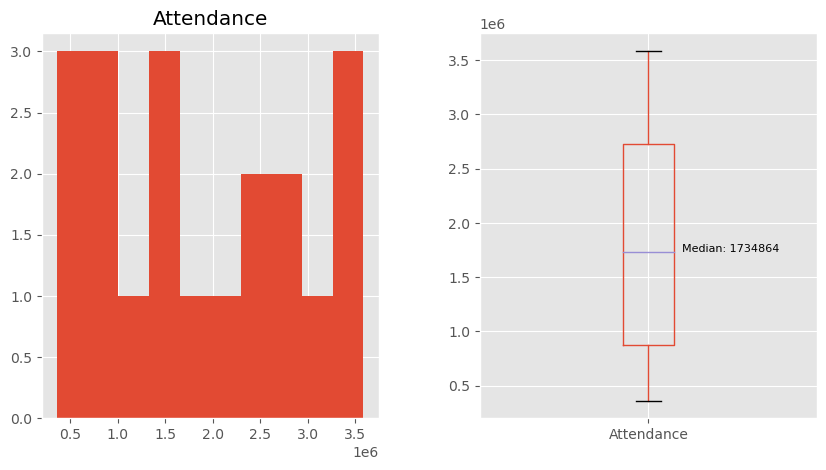

In [28]:
# Primero vamos a ver cómo se distribuye esta columna y detectaeremos si hay outliers

plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

df_copas.hist(ax=ax1, column="Attendance")
df_copas.boxplot(ax=ax2, column="Attendance")
med = round(df_copas.Attendance.median())
ax2.text(x=1.1, y=med, s=f"Median: {med}", fontsize=8)
plt.show()

In [29]:
# Vemos que no hay nada raro en los datos, por lo que podemos sacar directamente el máximo y la media
max_att = df_copas.Attendance.max()
avg_att = round(df_copas.Attendance.mean())
print(f"Asistencia máxima: {max_att} personas")
print(f"Asistencia media: {avg_att} personas")

# Vemos que la media y la mediana son parecidas, lo que confirma que no tenemos datos anómalos

Asistencia máxima: 3587538 personas
Asistencia media: 1872882 personas


## 6. Asistencia de público en función del país

Sabemos que, dependiendo del país donde se celebre la copa del mundo, ésta tiene un mayor o menor impacto o relevancia. Vamos a calcular la media de asistencia agrupando por país. Finalmente, ordenar los resultados por orden decreciente de este número medio de asistentes.

**Pista 1:** Como se muestra en el siguiente ejemplo, recuerda que podemos combinar la función [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) con otras funciones de agregación como `mean`.

**Pista 2:** Recuerda que podemos usar la función [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) para ordenar un DataFrame por una de sus columnas. Por ejemplo, el siguiente código muestra los mundiales ordenados de forma decreciente por el número de goles marcados:

```python
df_copas.sort_values("GoalsScored", ascending=False)
```

In [30]:
# df_personas = pd.DataFrame(
#     [
#         ("Juan", "male", 56),
#         ("Laura", "female", 23),
#         ("José", "male", 46),
#         ("Rosa", "female", 26)
#     ], columns=["name", "gender", "age"])

# # edad media de todas las personas
# edad_media = df_personas["age"].mean()
# # edad media agrupando por género
# edad_media_por_genero = df_personas.groupby("gender").mean()[["age"]]

# print(f"La edad media de las {len(df_personas)} es de {edad_media} años.")
# print(f"La edad media agrupada por género es:")
# edad_media_por_genero

In [31]:
(
    df_copas
    .groupby("Country")
    .mean(numeric_only=True)[["Attendance"]]
    .astype("int64")
    .sort_values(by="Attendance", ascending=False)
)

,Attendance
Country,
USA,3587538
South Africa,3178856
Korea/Japan,2705197
Germany,2612596
Brazil,2216028
Spain,2109723
Mexico,1999003
France,1580400
England,1563135


## 7. País con más victorias

Vamos a analizar el número de veces que un país ha ganado la copa del mundo. Transformar el DataFrame `df_copas` para que muestre los diferentes países que han ganado al menos una copa del mundo, y ordena el DataFrame por dicho número de forma descendente usando la función [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html).

¿Ves algo extraño o digno de comentar? Pista: analiza Alemania. **Hazlo en una nueva celda de tipo markdown.**

In [32]:
df_winners = (
    df_copas
    .groupby("Winner")
    .count()[["Year"]]
    .rename(columns={"Year": "Worldcups"})
    .sort_values(by="Worldcups", ascending=False)
    
)
df_winners

,Worldcups
Winner,
Brazil,5
Italy,4
Germany FR,3
Argentina,2
Uruguay,2
England,1
France,1
Germany,1
Spain,1


Vemos un caso peculiar y es el de Alemania. Este país aparece como `Germany RF` o `Germany`.

Esto es debido a que el país fué conocido como *República Federal de Alemania* (o simplemente *Alemania Occidental*) hasta 1990, año en el que se reunificaron las dos partes (Oriental y Occidental) en lo que hoy conocemos como Alemania ([Consultar artículo en Wikipedia](https://es.wikipedia.org/wiki/Alemania_Occidental)).

Según podemos consultar en [Wikipedia](https://es.wikipedia.org/wiki/Selecci%C3%B3n_de_f%C3%BAtbol_de_Alemania_Democr%C3%A1tica), la *República democrática de Alemania* (o *Alemania Oriental*) participó en la copa del mundo desde 1954 hasta 1990. ¿Bajo qué nombre?. 

Vamos a explorar el dataset `df_partidos` para averiguar con qué nombre partició la *RDA*.

In [33]:
df_countries = pd.concat([
    df_partidos[["Home Team Name"]].rename(columns={"Home Team Name":"Country"}),
    df_partidos[["Away Team Name"]].rename(columns={"Away Team Name":"Country"})
])
df_countries.loc[df_countries.Country.str.startswith('German')]["Country"].unique()

array(['Germany', 'Germany FR', 'German DR'], dtype=object)

Como vemos la *República Democrática de Alemania* ha sido registrada en el dataset como `German DR`

---
# Parte opcional

Los ejercicios anteriores son obligatorios y puntuan hasta un máximo de 80 puntos sobre 100.

Los siguientes ejercicios trabajan con los dataframes cargados para extraer información concreta a partir de los datos. 
Estos ejercicios son opcionales, pero es recomendable intentar resolverlos para adquirir habilidades.

---

## Creación de un nuevo DataFrame

A continuación vamos a trabajar con el DataFrame `df_partidos`. Vamos a centrarnos en la información a nivel de selección, siendo indiferente si el equipo juega en casa o fuera. En este sentido, la información disponible no es la mejor para trabajar cómodamente. Por ello, es habitual realizar transformaciones a los datos en función de las preguntas que le queramos hacer. A continuación crearemos un nuevo DataFrame llamado `df_paises`que contendrá todos los paises involucrados en la copa del mundo y el año en el que participaron. Es decir, un país que haya jugado varias copas del mundo aparecerá varias veces:


||Year|Country|
|---|---|---|
|0|1930|France|
|1|1930|USA|
|...|...|..|
|37|1938|France|
|...|...|..|

**Nota:** este problema se puede afrontar como mínimo de dos maneras diferentes

1. Generando dos dataframes, uno donde la columna `Country` se corresponde con `Home Team Name`, y otro donde la columna `Country` se corresponde con `Away Team Name`. Finalmente, combinar ambos DataFrames en uno solo.
2. Usar la función [melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) que nos permite convertir N columnas en un par de columnas llamadas `variable` y `value`, donde la primera es el nombre de una de las columnas y `value` el valor que tomó dicha variable.


In [34]:
# Vamos a resolver este problema usando melt(), ya que la técnica de concatenar dataframes la hemos hecho anteriormente

df_paises = pd.melt(
    df_partidos, 
    id_vars="Year", 
    value_vars=["Home Team Name", "Away Team Name"], 
    value_name="Country")[["Year", "Country"]].astype({"Year": "int32"})

df_paises

,Year,Country
0,1930,France
1,1930,USA
2,1930,Yugoslavia
3,1930,Romania
4,1930,Argentina
...,...,...
1665,2014,Belgium
1666,2014,Mexico
1667,2014,Greece
1668,2014,Switzerland


In [35]:
# #alternativa 1
# df_paises = (
#     pd.concat([
#         df_partidos[["Year", "Home Team Name"]].rename(columns={"Home Team Name": "Country"}),
#         df_partidos[["Year", "Away Team Name"]].rename(columns={"Away Team Name": "Country"})
#     ])
# )
# #alternativa 2
# df_paises = (
#     df_partidos
#     .melt(id_vars=["Year"], value_vars=["Home Team Name", "Away Team Name"])
#     .rename(columns={"value": "Country"})
#     [["Year", "Country"]]
# )

## 8. Número de países

Vamos a descubrir cuántos países han participado, al menos una vez, en una copa del mundo. Para ello vamos a trabajar con el DataFrame construido anteriormente y a usar la función de agregación [nunique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html).

In [36]:
(
    df_paises
    .groupby("Country")
    .nunique()
    .rename(columns={"Year": "Worldcup"})
    .sort_values("Worldcup", ascending=False)
)

# No es necesario filtrar, si los países aparecen aquí es que han participado alguna vez
#  , ya sea como local o como visitante

,Worldcup
Country,
Brazil,20
Italy,18
Argentina,16
Mexico,15
France,14
...,...
Haiti,1
Kuwait,1
Angola,1


## 9. Número de partidos por país

Ahora vamos a descubrir cuántos partidos ha jugado cada país. Operar con el DataFrame para que muestre un país por fila y una columna que indique el número de partidos que ha jugado. Ordenar el DataFrame por dicha columna de forma descendente.

In [37]:
# Por la forma en la que hemos construido el dataframe df_paises, un país aparece tantas veces
#   como partidos ha jugado. Por lo tanto sólo necesitamos contar las filas en las que aparece cada país
(
    df_paises
    .groupby("Country")
    .count()
    .rename(columns={"Year": "Matches"})
    .sort_values("Matches", ascending=False)
)

,Matches
Country,
Brazil,104
Italy,83
Argentina,77
Germany FR,62
England,62
...,...
Iraq,3
Kuwait,3
Serbia,3


In [38]:
# Podemos mejorar lo anterior añadiendo información del año
(
    df_paises
    .assign(Matches = 1)
    .groupby(["Country", "Year"])
    .sum()
    .reset_index()
    .sort_values("Matches", ascending=False)
)

,Country,Year,Matches
213,Italy,1982,7
101,Croatia,1998,7
163,Germany,2002,7
155,France,2006,7
153,France,1998,7
...,...,...,...
197,IR Iran,2006,1
45,Bolivia,1950,1
33,Belgium,1934,1
34,Belgium,1938,1


## 10. Partidos jugados por España

Vamos a trabajar a continuación con el DataFrame `df_partidos`. Seleccionar aquellos partidos (filas del dataframe) en los que España ha jugado como `Home Team`, es decir, donde la columna `Home Team` tiene el valor `España`. Recuerda que para la operación de filtrado hay que usar la función [.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html).


A continuación, haz una nueva selección en los que España ha jugado como `Away Team`, es decir, donde la columna `Away Team` tiene el valor `España`.

**Opcional:** ¿Podrías hacer una sola selección donde España haya jugado como `Home Team` o como `Away Team`?. Pista: consulta la documentación del operador de [disyunción](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing).

In [39]:
# Partidos en los que España ha jugado como equipo Local
sel= (
    df_partidos
    .loc[df_partidos["Home Team Name"] == "Spain"]
)
print(sel.shape)
sel.head()

(30, 20)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
23,1934.0,27 May 1934 - 16:30,Preliminary round,Luigi Ferraris,Genoa,Spain,3.0,1.0,Brazil,,21000.0,3.0,0.0,BIRLEM Alfred (GER),CARMINATI Ettore (ITA),IVANCSICS Mihaly (HUN),204.0,1111.0,ESP,BRA
55,1950.0,25 Jun 1950 - 15:00,Group 2,Durival de Brito,Curitiba,Spain,3.0,1.0,USA,,9511.0,0.0,1.0,VIANA Mario (BRA),DA COSTA VIEIRA Jose (POR),DE LA SALLE Charles (FRA),208.0,1208.0,ESP,USA
60,1950.0,29 Jun 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,2.0,0.0,Chile,,19790.0,2.0,0.0,MALCHER Alberto (BRA),MARINO Esteban (URU),ALVAREZ Alfredo (BOL),208.0,1193.0,ESP,CHI
64,1950.0,02 Jul 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,1.0,0.0,England,,74462.0,0.0,0.0,GALEATI Giovanni (ITA),LUTZ Jean (SUI),DATTILO Generoso (ITA),208.0,1199.0,ESP,ENG
149,1962.0,03 Jun 1962 - 15:00,Group 3,Estadio Sausalito,Vina Del Mar,Spain,1.0,0.0,Mexico,,11875.0,0.0,0.0,TESANIC Branko (YUG),VICUNA Claudio (CHI),VAN ROSBERG Walter Jose (CUW),231.0,1497.0,ESP,MEX


<div class="alert alert-block alert-warning"> 
    <p><strong><i class="fa fa-exclamation-circle"></i> Carácteres extraños</strong></p> 
    <p style="margin-left:10px;">
        El archivo <code>WorldCupMatches.csv</code> tiene una codificación de caracteres extraña que no se ha podido averiguar, tras hacer varias pruebas con distintas opciones.
    </p>
    <p style="margin-left:10px;">Al no poder resolver el problema, algunos textos (como la columna <code>Stadium</code> presentan caracteres extraños
    </p>
</div>

In [40]:
# Partidos en los que España ha jugado como equipo Visitante
sel= (
    df_partidos
    .loc[df_partidos["Away Team Name"] == "Spain"]
)
print(sel.shape)
sel.head()

(29, 20)


,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
28,1934.0,31 May 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1.0,1.0,Spain,,35000.0,0.0,0.0,BAERT Louis (BEL),ZENISEK Bohumil (TCH),IVANCSICS Mihaly (HUN),418.0,1122.0,ITA,ESP
30,1934.0,01 Jun 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1.0,0.0,Spain,,43000.0,1.0,0.0,MERCET Rene (SUI),IVANCSICS Mihaly (HUN),ZENISEK Bohumil (TCH),418.0,1123.0,ITA,ESP
69,1950.0,09 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Uruguay,2.0,2.0,Spain,,44802.0,1.0,2.0,GRIFFITHS Benjamin (WAL),DATTILO Generoso (ITA),ALVAREZ Alfredo (BOL),209.0,1207.0,URU,ESP
71,1950.0,13 Jul 1950 - 15:00,Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,6.0,1.0,Spain,,152772.0,3.0,0.0,LEAFE Reginald (ENG),MITCHELL George (SCO),DA COSTA VIEIRA Jose (POR),209.0,1186.0,BRA,ESP
73,1950.0,16 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Sweden,3.0,1.0,Spain,,11227.0,2.0,0.0,VAN DER MEER Karel (NED),LUTZ Jean (SUI),GARCIA Prudencio (USA),209.0,1206.0,SWE,ESP


In [61]:
# (Opcional) Por legibilidad, vamos a preparar una máscara que hará uso del operador disyunción "|"
mask = (df_partidos["Home Team Name"] == "Spain") | (df_partidos["Away Team Name"] == "Spain")

# Vamos a usar la máscara con .loc para hacer búsquedas
sel= (
    df_partidos
    .loc[mask]
)
print(sel.shape)


(59, 21)


## Calcular el vencedor de cada partido

El DataFrame `df_partidos` tiene la información de cada partido, incluyendo los goles marcados por cada equipo, pero no disponemos de una columna que indique si un equipo ganó o perdió. Vamos a crear una columna llamada `Ganador` que indique el nombre del equipo vencedor (con más goles). También podemos encontrar empates, en cuyo caso usaremos `pd.NA` para indicar que desconocemos el vencedor de dicho partido.

**Nota:** Se puede resolver realizando varias asignaciones, o una sola utilizando la función [pd.where](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.where.html).

In [42]:
# alternativa 1
df_partidos["Ganador"] = df_partidos["Home Team Name"]
df_partidos.loc[df_partidos["Home Team Goals"] < df_partidos["Away Team Goals"], "Ganador"] = df_partidos["Away Team Name"]
df_partidos.loc[df_partidos["Home Team Goals"] == df_partidos["Away Team Goals"], "Ganador"] = pd.NA

# alternativa 2
df_partidos["Ganador"] = (
    df_partidos["Home Team Name"].where(
        df_partidos["Home Team Goals"] > df_partidos["Away Team Goals"],
        df_partidos["Away Team Name"].where(df_partidos["Home Team Goals"] < df_partidos["Away Team Goals"], pd.NA)
    )
)

## 11. Número de victorias por país

Calcular para cada país el número de partidos ganados. Para ello, usar la función [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) para eliminar las filas correspondientes a partidos donde la columna `Ganador` es un valor perdido (`na`). Ordenar los países por número de victorias de forma descendente.

In [43]:
(
    df_partidos
    .dropna(subset="Ganador")
    .groupby("Ganador")
    .count()
    .loc[:,["MatchID"]]
    .rename(columns={"MatchID": "Wins"})
    .sort_values("Wins", ascending=False)
)


,Wins
Ganador,
Brazil,70
Italy,45
Argentina,42
Germany FR,36
Spain,29
...,...
Cuba,1
Korea DPR,1
Wales,1


## Opcional 1

Calcular para cada país el ratio de victorias, calculado como el número de partidos ganados dividido por el número de partidos jugados. Ordenar los países por ratio de forma descendente.

**Pista:** Si obtenemos dos dataframes, uno con las victorias por cada país y otro con el número total de partidos jugados, podemos utilizar la función [pd.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) para combinar ambos en un solo DataFrame, y despues crear una nueva columna que sea el ratio.

In [44]:
# Nos preparamos un dataframe fusionando el equipo local y el visitante
df_match_vs_win = (
    df_partidos
    .melt(id_vars=["MatchID", "Ganador"], value_vars=["Home Team Name", "Away Team Name"], value_name="Country")
    .loc[:,["MatchID", "Country", "Ganador"]]
)

# Creamos un dataframe con la cuenta de victorias, lo preparamos para poder fusionar por "Country"
df_win = (
    df_match_vs_win
    .groupby("Ganador")
    .nunique()
    .loc[:,["MatchID"]]
    .reset_index()
    .rename(columns={"Ganador": "Country", "MatchID": "Wins"})
)

# Creamos un dataframe con la cuenta de partidos jugados
df_match = (
    df_match_vs_win
    .groupby("Country")
    .count()
    .loc[:,["MatchID"]]
    .reset_index()
    .rename(columns={"MatchID": "Matches"})
)

# Juntamos ambos dataframes para tener en columnas distintas, partidos jugados y partidos ganados
# Si un país nunca ha ganado tendrá NaN en la columna de "Wins", lo cambiamos por 0
df_victory_ratio = df_match.merge(df_win, how="left").fillna(0.0)

# Calculamos el ratio victorias/partidos totales
df_victory_ratio["ratio"] = df_victory_ratio.apply(lambda x: x.Wins / x.Matches, axis=1)

# Mostramos el resultado ordenado
df_victory_ratio.loc[:, ["Country", "ratio"]].sort_values("ratio", ascending=False)

,Country,ratio
28,Germany,0.674419
7,Brazil,0.673077
29,Germany FR,0.580645
2,Argentina,0.545455
39,Italy,0.542169
...,...,...
24,El Salvador,0.000000
48,New Zealand,0.000000
37,Iraq,0.000000
32,Haiti,0.000000


## Opcional 2

¿Se te ocurre alguna pregunta adicional que hacerle a los datos? Utiliza una celda de tipo markdown para documentarla y otra de código para implementarla y ver así la respuesta.

Hay dos preguntas que nos podemos hacer sobre el DataFrame `df_jugadores`.

1. ¿Cuál es el jugador que más goles ha marcado durante su participación en mundiales de fútbol?
1. ¿Cuál es el jugador que ha jugado más copas del mundo? 

### Jugador que ha marcado un mayor número de goles

Para realizar este ejercicio estaremos interesados en estas dos columnas de `df_jugadores`

- `Player Name`: indica el nombre del jugador
- `Event`: indica distintos eventos que hayan ocurrido en el paritdo. Esta es una columna que está en formato *messy* lo que nos obligará a pre-procesarla

<div class="alert alert-block alert-warning"> 
    <p><strong><i class="fa fa-exclamation-circle"></i> Presencia de valores nulos</strong></p> 
    <p style="margin-left:10px;">Para este ejercicio emplearemos una columna que conocemos que contiene valores nulos <code>Event</code></p>
    <p style="padding:10px;">Tras analizar el dataset se conviene que el significado de los nulos será el siguiente:
        <ul>
            <li>En <code>Event</code> los valores nulos indican que no se ha registrado ningún evento significativo para ese jugador (gol, tarjeta, etc.)</li>
        </ul>
    </p>
</div>



In [45]:
# Como estamos interesados en los goleadores, vamos a filtrar el dataframe quitando los registros sin eventos
#  Nos vamos a quedar sólo con las columnas de interés
df_goleadores = df_jugadores.dropna(subset="Event")[["Player Name", "Event"]]
print(df_goleadores.shape)
df_goleadores.head()

(8823, 2)


,Player Name,Event
2,Marcel LANGILLER,G40'
3,Juan CARRENO,G70'
6,Andre MASCHINOT,G43' G87'
14,Lucien LAURENT,G19'
35,Tom FLORIE,G45'


In [46]:
# Analizamos los nulos del dataframe
df_goleadores.isnull().sum()

Player Name    0
Event          0
dtype: int64

In [47]:
# Procesamos la variable Event

# Separamos la variable Event en una lista dentro de una nueva columna
df_goleadores["Goals"] = df_goleadores.Event.str.split(" ")

# Separamos los distintos posibles goles en filas diferentes
df_goleadores = df_goleadores.explode("Goals")

# Filtramos los eventos que son realmente goles (los que empiezan por G)
#  Nos quedamos sólo con las columnas de interés
df_goleadores = df_goleadores.loc[df_goleadores.Goals.str.startswith("G")][["Player Name", "Goals"]]

print(df_goleadores.shape)
df_goleadores.head()

(2163, 2)


,Player Name,Goals
2,Marcel LANGILLER,G40'
3,Juan CARRENO,G70'
6,Andre MASCHINOT,G43'
6,Andre MASCHINOT,G87'
14,Lucien LAURENT,G19'


In [48]:
# No se ha podido averiguar cuál es la codificación de caracteres para WorldCupPlayers.csv, con lo que 
#  hay nombres de jugadores que contienen caracteres extraños.
# En esta celda arreglamos algunos casos
def fix_encoding(s: str) -> str:
    if s is not None:
        s = s.replace("PEL�", "PELÉ")
        s = s.replace("M�LLER", "MÜLLER")
        return s
    else:
        return None

df_goleadores["Player Name"] = df_goleadores["Player Name"].apply(fix_encoding)

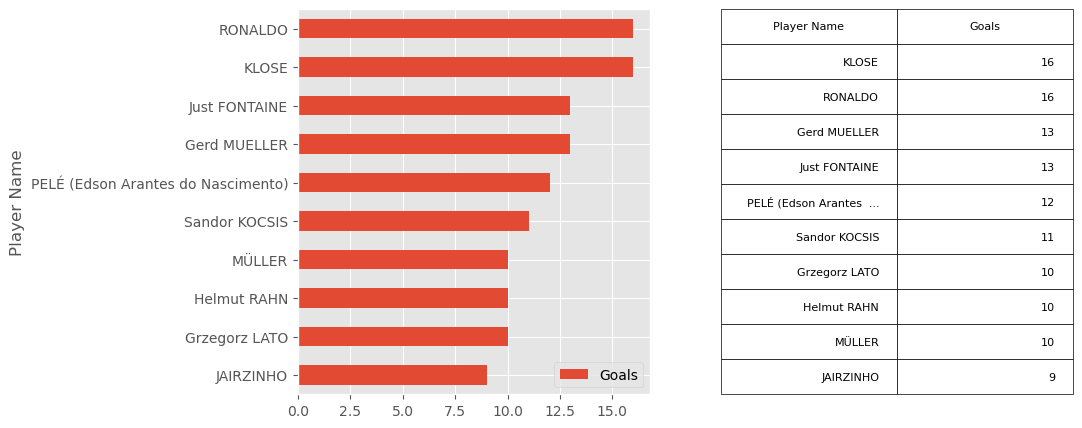

In [49]:
# Aquí podemos ver el TOP 10 goleadores
df_goals_by_player = df_goleadores.groupby("Player Name").count()[["Goals"]]
top_10 = df_goals_by_player.nlargest(10, "Goals").sort_values("Goals")

# preparamos la represenación gráfica
plt.figure(figsize=(10,5))

# Mostramos el gráfico de barras
ax1 = plt.subplot(121)
top_10.plot(kind="barh", ax=ax1)

# Mostramos los datos del dataframe a la derecha
ax2 = plt.subplot(122)
bbox = [0, 0, 1, 1]
ax2.axis('off')
top_10 = top_10.sort_values("Goals", ascending=False).reset_index()
top_10["Player Name"] = top_10["Player Name"].apply(lambda x: x[:20] if len(x) <=20 else f"{x[:20]} ...")
tbl = ax2.table(colLabels=top_10.columns, cellText=top_10.values, bbox=bbox)
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)
plt.show()


### Jugador que ha participado en más copas del mundo

Para este ejercicio deberemos fusionar los dataframes `df_jugadores` con `df_partidos`.

Nos interesan las siguientes columnas

- `df_jugadores`:
    - `MatchID`: Identificador único del partido
    - `Player Name`: Nombre del jugador
- `df_partidos`:
    - `MatchID`: Identificador único del partido
    - `Year`: Año en el que se ha celebrado la copa del mundo

In [50]:
# Fusionamos los dataframes de interés
df_merged = (
    df_jugadores
    .loc[:,["MatchID", "Player Name"]]
    .merge(
        df_partidos.loc[:,["MatchID",  "Year"]],
        how="inner"
    )
)
print(df_merged.shape)
df_merged.head()

(37002, 3)


,MatchID,Player Name,Year
0,1096,Alex THEPOT,1930.0
1,1096,Oscar BONFIGLIO,1930.0
2,1096,Marcel LANGILLER,1930.0
3,1096,Juan CARRENO,1930.0
4,1096,Ernest LIBERATI,1930.0


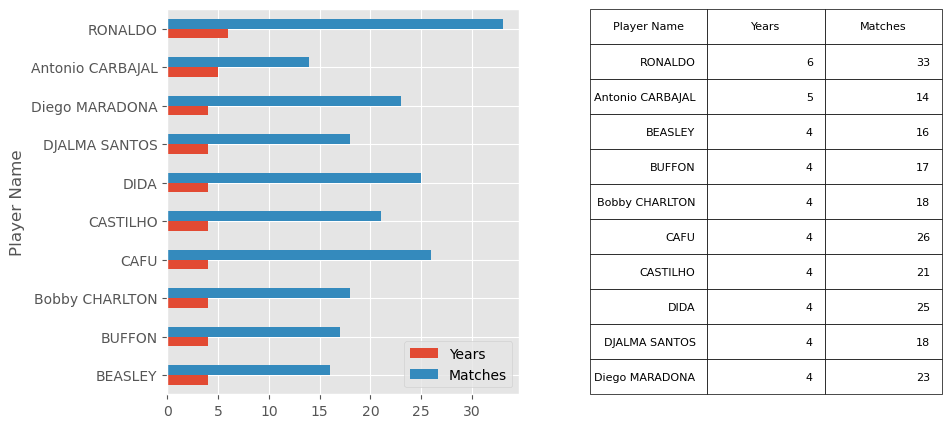

In [51]:
# Contamos en cuántas copas del mundo ha participado cada jugador y nos quedamos con el top 10
df_worldcup_by_player = (
    df_merged
    .groupby("Player Name")
    .nunique()
    .rename(columns={"MatchID": "Matches", "Year": "Years"})
    .nlargest(10, "Years")
    .sort_values("Years")
    .loc[:,["Years", "Matches"]]
)

# preparamos la represenación gráfica
plt.figure(figsize=(10,5))

# Mostramos el gráfico de barras
ax1 = plt.subplot(121)
df_worldcup_by_player.plot(kind="barh", ax=ax1)

# Mostramos los datos del dataframe a la derecha
ax2 = plt.subplot(122)
bbox = [0, 0, 1, 1]
ax2.axis('off')
df_worldcup_by_player = df_worldcup_by_player.sort_values("Years", ascending=False).reset_index()
tbl = ax2.table(
    colLabels=df_worldcup_by_player.columns, 
    cellText=df_worldcup_by_player.values, 
    bbox=bbox)
tbl.auto_set_font_size(False)
tbl.set_fontsize(8)
plt.show()
